<a href="https://colab.research.google.com/github/alfaroqueIslam/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [1]:
# TODO - your code!
import pandas as pd
import numpy as np
from scipy import stats 

# Confidence Intervals
# Grab the file from UCI:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-05-12 18:24:27--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-05-12 18:24:27 (612 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [2]:
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']
df = pd.read_csv('house-votes-84.data', names=column_headers)
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [3]:
df = df.replace({"y": 1, "n": 0, "?": np.NaN})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
wtr_prj = df['water-project'].dropna()


In [0]:
def confidence_interval(data, confidence=0.95):
  
  data = np.array(data)
  x_bar = np.mean(data)
  n = len(data)
  s = np.std(data, ddof=1)
  std_err = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*std_err
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error
  return (lower_bound, x_bar, upper_bound)

In [22]:
confidence_interval(wtr_prj)

(0.45384081311663604, 0.5038759689922481, 0.5539111248678601)

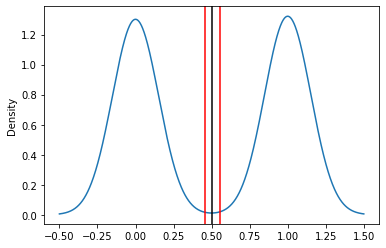

In [23]:
import matplotlib.pyplot as plt
lower, mean, upper = confidence_interval(wtr_prj)

wtr_prj.plot.density()
plt.axvline(x=lower, color='red')
plt.axvline(x=mean, color='black')
plt.axvline(x=upper, color='red')
plt.show()

In [71]:
moe = upper - mean
moe

0.050035155875612025

The confidence interval does not capture 95% of the data in our sample. There is a very low margin of error.

In [36]:
# Chi-squared tests

df1 = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [61]:
observed = pd.crosstab(df1['salary'], df1['education-num'])

observed

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
salary,,,,,,,,,,,,,,,,
<=50K,51,162,317,606,487,871,1115,400,8826,5904,1021,802,3134,764,153,107
>50K,0,6,16,40,27,62,60,33,1675,1387,361,265,2221,959,423,306


In [62]:
observed_margins = pd.crosstab(df1['salary'], df1['education-num'], margins=True)

observed_margins

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,All
salary,,,,,,,,,,,,,,,,,
<=50K,51,162,317,606,487,871,1115,400,8826,5904,1021,802,3134,764,153,107,24720
>50K,0,6,16,40,27,62,60,33,1675,1387,361,265,2221,959,423,306,7841
All,51,168,333,646,514,933,1175,433,10501,7291,1382,1067,5355,1723,576,413,32561


In [64]:
row_sums = observed_margins.iloc[0:2, 16:].values
row_sums = row_sums.T[0]

row_sums

array([24720,  7841])

In [65]:
col_sums = observed_margins.iloc[2:, 0:16].values
col_sums = col_sums[0]

col_sums

array([   51,   168,   333,   646,   514,   933,  1175,   433, 10501,
        7291,  1382,  1067,  5355,  1723,   576,   413])

In [66]:
total_total = df.shape[0]

total_total

435

In [67]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 16)
[[  2898.20689655   9547.03448276  18923.5862069   36710.62068966
   29209.37931034  53020.13793103  66772.4137931   24606.34482759
  596746.48275862 414329.93103448  78535.72413793  60635.03448276
  304311.72413793  97913.93103448  32732.68965517  23469.79310345]
 [   919.28965517   3028.24827586   6002.42068966  11644.33563218
    9264.99770115  16817.59310345  21179.71264368   7804.94942529
  189283.54252874 131422.37011494  24910.94712644  19232.9816092
   96525.4137931   31057.57011494  10382.56551724   7444.44367816]]


In [68]:
chi2 = ((observed - expected)**2 / expected).sum().sum()

chi2

2372656.594224889

In [69]:
# Using scipy
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print(" chi2 statistic", chi2)
print("\n p-value", p_value)
print("\n degrees of freedom",dof)
print("\n expected frequencies table: \n", expected)

 chi2 statistic 4429.653302288619

 p-value 0.0

 degrees of freedom 15

 expected frequencies table: 
 [[  38.71871257  127.54399435  252.81041737  490.43702589  390.22388747
   708.3246829   892.04877     328.72946163 7972.25883726 5535.25751666
  1049.20119161  810.05620221 4065.46481988 1308.08513252  437.29369491
   313.54565277]
 [  12.28128743   40.45600565   80.18958263  155.56297411  123.77611253
   224.6753171   282.95123     104.27053837 2528.74116274 1755.74248334
   332.79880839  256.94379779 1289.53518012  414.91486748  138.70630509
    99.45434723]]


Due to a chi2 value of 4429.65, and a p-value of 0. We reject the null hypothesis that salary and number of years of education obtained are independent, and suggest the alternative, that they are strongly associated.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)